# https://datahub.io/core/co2-ppm#data

In [36]:
import pandas as pd

df = pd.read_csv("co2-mm-mlo.csv")
df.reset_index(inplace=True); df.drop(columns=["Number of Days", "Trend"], inplace=True); df

,index,Date,Decimal Date,Average,Interpolated
0,1958-03,1958.2027,315.70,314.43,-1
1,1958-04,1958.2877,317.45,315.16,-1
2,1958-05,1958.3699,317.51,314.71,-1
3,1958-06,1958.4548,317.24,315.14,-1
4,1958-07,1958.5370,315.86,315.18,-1
...,...,...,...,...,...
786,2023-09,2023.7083,418.51,421.96,18
787,2023-10,2023.7917,418.82,422.12,27
788,2023-11,2023.8750,420.46,422.43,21
789,2023-12,2023.9583,421.86,422.56,20


In [37]:
df.rename(columns = {'index': 'Date', 'Date': 'Decimal Date', 'Decimal Date': 'Interpolated',
                     'Average': 'Trend','Interpolated': 'Number of Days'}, inplace=True);
df["Average"] = (df["Interpolated"] + df["Trend"]) / 2; df

,Date,Decimal Date,Interpolated,Trend,Number of Days,Average
0,1958-03,1958.2027,315.70,314.43,-1,315.065
1,1958-04,1958.2877,317.45,315.16,-1,316.305
2,1958-05,1958.3699,317.51,314.71,-1,316.110
3,1958-06,1958.4548,317.24,315.14,-1,316.190
4,1958-07,1958.5370,315.86,315.18,-1,315.520
...,...,...,...,...,...,...
786,2023-09,2023.7083,418.51,421.96,18,420.235
787,2023-10,2023.7917,418.82,422.12,27,420.470
788,2023-11,2023.8750,420.46,422.43,21,421.445
789,2023-12,2023.9583,421.86,422.56,20,422.210


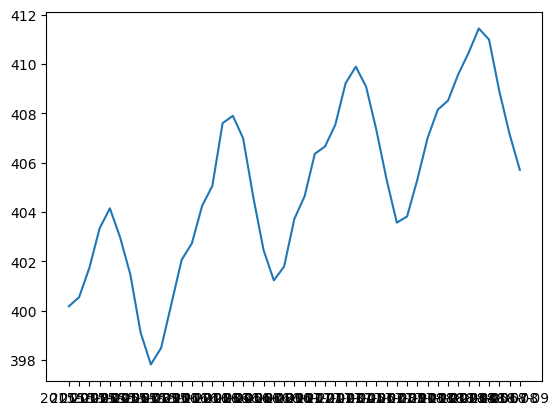

In [38]:
import matplotlib.pyplot as plt
fechas = df[(df["Date"] >= "2015-01") & (df["Date"] <= "2018-09")]

fig, ax = plt.subplots()
ax.plot(fechas["Date"], fechas["Interpolated"])
plt.show()

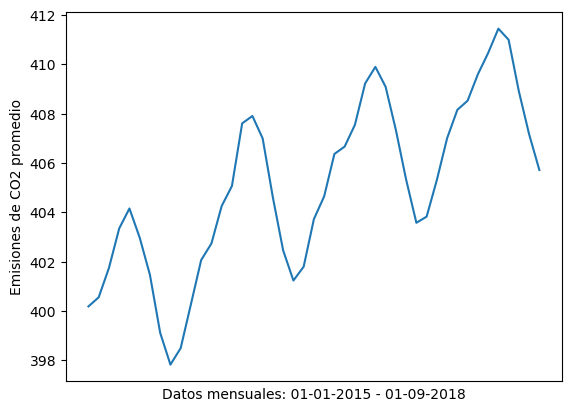

In [39]:
import matplotlib.pyplot as plt
fechas = df[(df["Date"] >= "2015-01") & (df["Date"] <= "2018-09")]

fig, ax = plt.subplots()
ax.plot(fechas["Date"], fechas["Interpolated"])
ax.axes.xaxis.set_ticks([])
plt.xlabel("Datos mensuales: 01-01-2015 - 01-09-2018")
plt.ylabel("Emisiones de CO2 promedio")
plt.show()

In [40]:
# Creación de una función que grafica series de tiempo
def grafica_series_tiempo(ejes, x, y, color, etiqueta_x, etiqueta_y):
    ejes.plot(x,y, color=color)
    ejes.set_xlabel(etiqueta_x)
    ejes.set_ylabel(etiqueta_y, color=color)
    ejes.tick_params('y', colors=color)

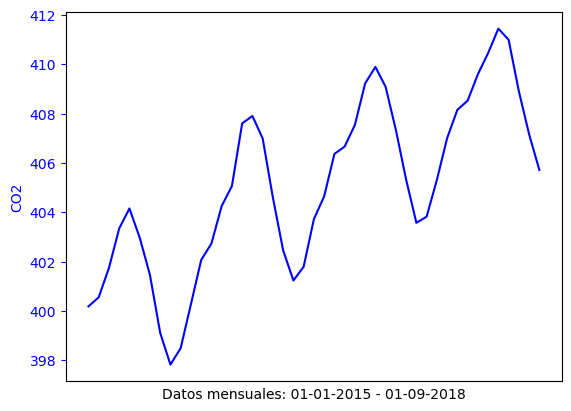

In [41]:
fig, ax = plt.subplots()
grafica_series_tiempo(ax, fechas["Date"], fechas["Interpolated"], 'blue',
                     'Datos mensuales: 01-01-2015 - 01-09-2018', 'CO2')
ax.axes.xaxis.set_ticks([])
plt.show()

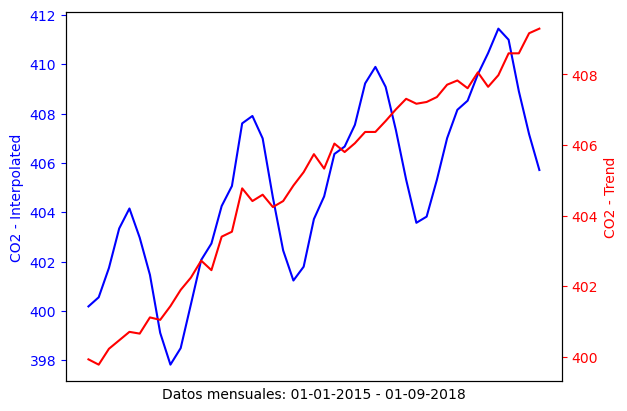

In [43]:
fig, ax = plt.subplots()
grafica_series_tiempo(ax, fechas["Date"], fechas["Interpolated"], 'blue',
                     'Datos mensuales: 01-01-2015 - 01-09-2018', 'CO2 - Interpolated')

ax2 = ax.twinx()

grafica_series_tiempo(ax2, fechas["Date"], fechas["Trend"], 'red', '', 'CO2 - Trend')
ax.axes.xaxis.set_ticks([])
plt.show()

,Date,Decimal Date,Interpolated,Average,Number of Days
682,2015-01,2015.0417,400.18,399.92,30
683,2015-02,2015.1250,400.55,399.77,28
684,2015-03,2015.2083,401.74,400.22,24
685,2015-04,2015.2917,403.34,400.46,26
686,2015-05,2015.3750,404.15,400.70,30
687,2015-06,2015.4583,402.97,400.65,29
688,2015-07,2015.5417,401.46,401.11,24
689,2015-08,2015.6250,399.11,401.04,28
690,2015-09,2015.7083,397.82,401.43,25
691,2015-10,2015.7917,398.49,401.89,28
